In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv("data.csv")
df

,run,local_list,mutex_lock,cpu_pinned,k,num_threads,time1,time2,time3
0,0,0,0,0,200,2,561,584,513
1,0,0,0,0,400,2,447,731,406
2,0,0,0,0,800,2,937,1089,918
3,0,0,0,0,200,4,3015,725,618
4,0,0,0,0,400,4,999,1561,2436
...,...,...,...,...,...,...,...,...,...
67,3,0,0,1,400,32,9722,9298,8911
68,3,0,0,1,800,32,17492,17968,18354
69,3,0,0,1,200,64,9570,8244,9413
70,3,0,0,1,400,64,17988,18613,17448


In [35]:
df = pd.melt(df, id_vars=['run', 'local_list', 'mutex_lock', 'cpu_pinned', 'k', 'num_threads'], value_vars=['time1', 'time2', 'time3'], var_name='obs', value_name='time')
df = df.drop(['local_list', 'mutex_lock', 'cpu_pinned'], axis=1)
df = df.groupby(['run', 'k', 'num_threads']).mean().reset_index()
df['run'] = df.run.map({0:'Baseline', 1: 'Local List', 2: 'Mutex Lock', 3: 'CPU Pinned'})
df = df.sort_values("run")
df

C:\Users\DFCS-General\AppData\Local\Temp\ipykernel_11896\3070451397.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby(['run', 'k', 'num_threads']).mean().reset_index()


,run,k,num_threads,time
0,Baseline,200,2,552.666667
16,Baseline,800,32,17170.666667
15,Baseline,800,16,9019.666667
14,Baseline,800,8,4679.000000
13,Baseline,800,4,2714.333333
...,...,...,...,...
48,Mutex Lock,800,2,774.666667
49,Mutex Lock,800,4,2131.333333
50,Mutex Lock,800,8,3187.333333
44,Mutex Lock,400,8,2382.000000


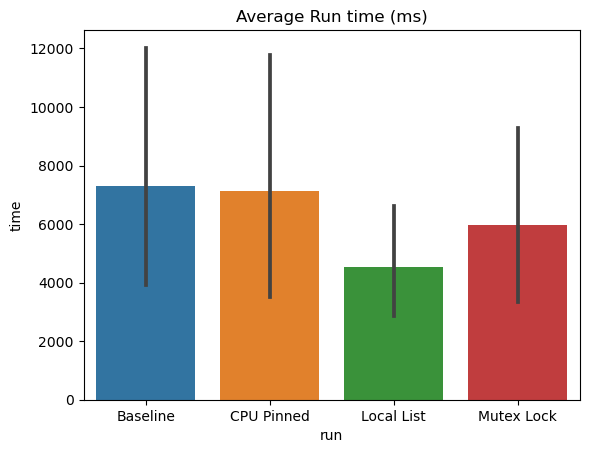

In [36]:
sns.barplot(data=df, x='run', y='time')
plt.title("Average Run time (ms)")
plt.show()

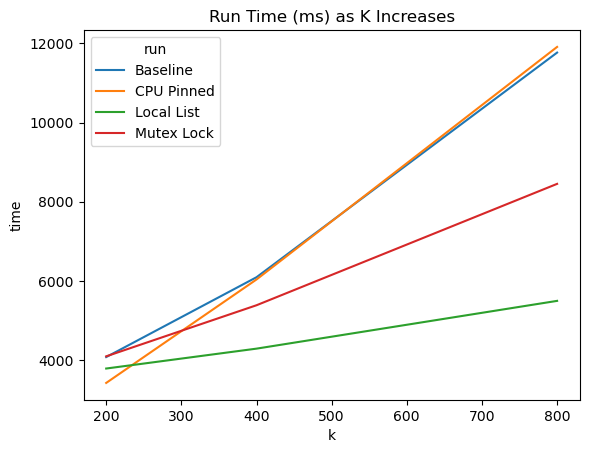

In [37]:
sns.lineplot(data=df.groupby(['run', 'k']).mean().reset_index().sort_values("run"), x='k', y='time', hue='run')
plt.title("Run Time (ms) as K Increases")
plt.show()

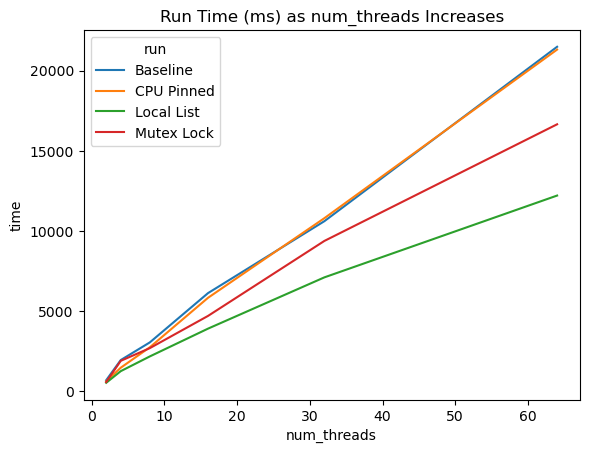

In [38]:
sns.lineplot(data=df.groupby(['run', 'num_threads']).mean().reset_index().sort_values("run"), x='num_threads', y='time', hue='run')
plt.title("Run Time (ms) as num_threads Increases")
plt.show()